# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [16]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

print(iris.data)
print(df.describe())

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.05

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
def alpha_func(D, idx):
    sepal_width = D.iloc[idx]['Sepal.Width']
    sepal_length = D.iloc[idx]['Sepal.Length']
    alpha = sepal_width.mean() / sepal_length.mean()
    return alpha

Test the code below

In [4]:
alpha_func(df, range(100))

0.566441235605922

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [5]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.5518687329079308

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Calculating  mean of Sepal.Length gives you a single point estimate of the average sepal length. But this point estimate does not provide information about the variability or uncertainty of the estimate. Bootstrapping allows to estimate the variability. Confidence intervals around the mean, giving a range within which the true mean is likely to fall

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [8]:


# Add your code here to set the seed


np.random.seed(42)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [11]:
# Your code here
def boot_SE(data, num_samples):
    n = len(data)
    indices = np.random.randint(0, n, (num_samples, n))
    samples = data[indices]
    means = np.mean(samples, axis=1)
    se = np.std(means)
    return se

B = 1000
sepal_length = df['Sepal.Length'].values
bootstrap_se = boot_SE(sepal_length, B)
print("Bootstrap standard error:", bootstrap_se)

Bootstrap standard error: 0.06853610473968365


_(vi)_ What is the original mean value of `Sepal.Length`?

In [12]:
# Your code here
original_mean = np.mean(sepal_length)
print("Original mean ", original_mean)
# Original mean of Sepal.Length: 5.843333333333334

Original mean of Sepal.Length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [13]:
# Add your code here

boot_se_samples = [np.mean(np.random.choice(sepal_length, size=len(sepal_length), replace=True)) for _ in range(B)]
boot_mean = np.mean(boot_se_samples)
boot_std = np.std(boot_se_samples)
t_range = np.ptp(boot_se_samples)

print("Bootstrapped mean:", boot_mean)
print("Bootstrapped standard deviation:", boot_std)
print("Bootstrapped range:", t_range)

Bootstrapped mean: 5.841731333333334
Bootstrapped standard deviation: 0.06490012357803673
Bootstrapped range: 0.3893333333333322


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [14]:
# Add your code here
ci_lower = np.percentile(boot_se_samples, 2.5)
ci_upper = np.percentile(boot_se_samples, 97.5)

print("95% Confidence Interval:", (ci_lower, ci_upper))

95% Confidence Interval: (5.7120000000000015, 5.9647)


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

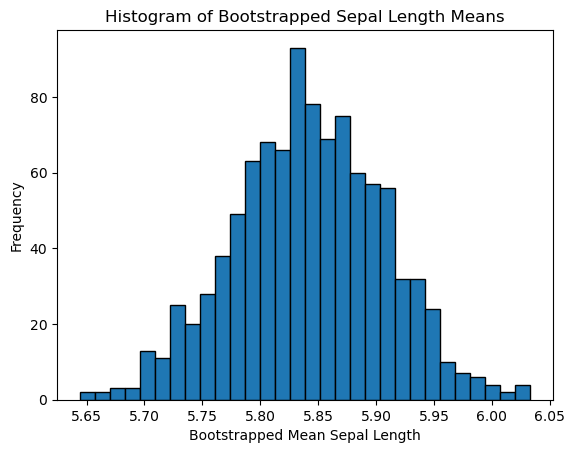

In [15]:


# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_se_samples, bins=30, edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Sepal Length Means')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean Sepal Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

# The histogram shows the distribution of average sepal lengths from many bootstrapped samples.

# Most Common Value: The peak around 5.84 means most samples had an average sepal length near this value.
# Spread: The range from about 5.65 to 6.05 shows the variability in these averages.
# Normal Shape: The bell-shaped curve suggests that our average sepal length estimate is reliable.

# Overall average sepal length is around 5.84 with some variability

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here
# The bootstrapped mean sepal length of the iris flowers is approximately 5.84 cm. 
# The ootstrapped standard deviation is 0.065 cm, and the 95% confidence interval is from 5.70 cm to 5.95 cm.

# Based on that average sepal length of approximately 5.84 cm but ensure that space can accommodate lengths between 5.70 cm and 5.95 cm for most flowers.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
